In [1]:
#-------------------チュートリアル-------------------
#ファイル読み込み
path="C:\\Users\Ono Shuya\\OneDrive\\デスクトップ\\独習　Pythonバイオ情報解析\\Python_bio\\chapter04\\s288c_n20.gff"
with open(path,'r') as f: #読み込み専用でファイルを開く
    line=f.readline() #１行目を読み込んでいる
    all=f.read()#２行目から一括で読み込んでいる
    print("１行読み込み:"+line)
    print("一括読み込み:"+all)

１行読み込み:##gff-version 3

一括読み込み:#!gff-spec-version 1.21
#!processor NCBI annotwriter
#!genome-build R64
#!genome-build-accession NCBI_Assembly:GCF_000146045.2
#!annotation-source SGD R64-2-1
##sequence-region NC_001133.9 1 230218
##species https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=559292
NC_001133.9	RefSeq	region	1	230218	.	+	.	ID=id0;Dbxref=taxon:559292;Name=I;chromosome=I;gbkey=Src;genome=chromosome;mol_type=genomic DNA;strain=S288C
NC_001133.9	RefSeq	telomere	1	801	.	-	.	ID=id1;Dbxref=SGD:S000028862;Note=TEL01L%3B Telomeric region on the left arm of Chromosome I%3B composed of an X element core sequence%2C X element combinatorial repeats%2C and a short terminal stretch of telomeric repeats;gbkey=telomere
NC_001133.9	RefSeq	origin_of_replication	707	776	.	+	.	ID=id2;Dbxref=SGD:S000121252;Note=ARS102~Autonomously Replicating Sequence;gbkey=rep_origin
NC_001133.9	RefSeq	gene	1807	2169	.	-	.	ID=gene0;Dbxref=GeneID:851229;Name=PAU8;end_range=2169,.;gbkey=Gene;gene=PAU8;g

In [2]:
# #の文字で始まる行のデータを出力
with open(path) as f:
    for line in f:
        line =line.rstrip() #改行コードを削除
        
        if line.startswith('#'): # #の文字で始まるかどうか
            print(line)

##gff-version 3
#!gff-spec-version 1.21
#!processor NCBI annotwriter
#!genome-build R64
#!genome-build-accession NCBI_Assembly:GCF_000146045.2
#!annotation-source SGD R64-2-1
##sequence-region NC_001133.9 1 230218
##species https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=559292


In [3]:
# #の文字で始まる行以外から特定の列のデータを１つずつ出力
with open(path) as f:
    for line in f:
        line =line.rstrip()
        
        if line.startswith('#'):
            continue # #で始まる行なら後の処理をとばす
        s=line.split('\t') #タブでデータを区切る
        items=s[8].split(';') #各行の９列目データを';'ごとに区切る
        for item in items:
            print(item)

ID=id0
Dbxref=taxon:559292
Name=I
chromosome=I
gbkey=Src
genome=chromosome
mol_type=genomic DNA
strain=S288C
ID=id1
Dbxref=SGD:S000028862
Note=TEL01L%3B Telomeric region on the left arm of Chromosome I%3B composed of an X element core sequence%2C X element combinatorial repeats%2C and a short terminal stretch of telomeric repeats
gbkey=telomere
ID=id2
Dbxref=SGD:S000121252
Note=ARS102~Autonomously Replicating Sequence
gbkey=rep_origin
ID=gene0
Dbxref=GeneID:851229
Name=PAU8
end_range=2169,.
gbkey=Gene
gene=PAU8
gene_biotype=protein_coding
locus_tag=YAL068C
partial=true
start_range=.,1807
ID=rna0
Parent=gene0
Dbxref=GeneID:851229,Genbank:NM_001180043.1
Name=NM_001180043.1
end_range=2169,.
gbkey=mRNA
gene=PAU8
partial=true
product=seripauperin PAU8
start_range=.,1807
transcript_id=NM_001180043.1
ID=id3
Parent=rna0
Dbxref=GeneID:851229,Genbank:NM_001180043.1
end_range=2169,.
gbkey=mRNA
gene=PAU8
partial=true
product=seripauperin PAU8
start_range=.,1807
transcript_id=NM_001180043.1
ID=cds0

In [4]:
# #の文字で始まる行以外からproductデータを１つずつ出力
with open(path) as f:
    for line in f:
        line =line.rstrip()
        
        if line.startswith('#'):
            continue # #で始まる行なら後の処理をとばす
        s=line.split('\t') #タブでデータを区切る
        items=s[8].split(';') #各行の９列目データを';'ごとに区切る
        for item in items:
            if item.startswith('product='):
                print(item)

product=seripauperin PAU8
product=seripauperin PAU8
product=seripauperin PAU8
product=hypothetical protein
product=hypothetical protein
product=hypothetical protein


In [5]:
#RNA-Seqカウントデータの処理
import pandas as pd
import numpy as np

count_file="C:\\Users\\Ono Shuya\\OneDrive\\デスクトップ\\独習　Pythonバイオ情報解析\\Python_bio\\chapter07\\counts.txt"
gene_id_product_file="C:\\Users\\Ono Shuya\\OneDrive\\デスクトップ\\独習　Pythonバイオ情報解析\\Python_bio\\chapter07\\gene_id_product.tsv"

df=pd.read_table(count_file,skiprows=1,index_col=0) #txtファイルの読み込み
print(df.shape)
df.head(5)

(6420, 11)


,Chr,Start,End,Strand,Length,SRR453566.sorted.bam,SRR453567.sorted.bam,SRR453568.sorted.bam,SRR453569.sorted.bam,SRR453570.sorted.bam,SRR453571.sorted.bam
Geneid,,,,,,,,,,,
gene_0001,NC_001133.9,1807,2169,-,363,0,2,6,0,0,1
gene_0002,NC_001133.9,2480,2707,+,228,0,0,0,0,0,0
gene_0003,NC_001133.9,7235,9016,-,1782,0,0,0,0,0,0
gene_0004,NC_001133.9,11565,11951,-,387,0,0,0,0,0,0
gene_0005,NC_001133.9,12046,12426,+,381,2,8,10,6,7,18


In [6]:
names={'SRR453566.sorted.bam':'batch_1',
      'SRR453567.sorted.bam':'batch_2',
      'SRR453568.sorted.bam':'batch_3',
      'SRR453569.sorted.bam':'chemostat_1',
      'SRR453570.sorted.bam':'chemostat_2',
      'SRR453571.sorted.bam':'chemostat_3'}
df=df.rename(mapper=names,axis=1) #列名を変更
df=df[df.Chr!='NC_001224.1'] #ミトコンドリア（NC_001224.1）上の遺伝子データを削除
print(df.shape)
df

(6394, 11)


,Chr,Start,End,Strand,Length,batch_1,batch_2,batch_3,chemostat_1,chemostat_2,chemostat_3
Geneid,,,,,,,,,,,
gene_0001,NC_001133.9,1807,2169,-,363,0,2,6,0,0,1
gene_0002,NC_001133.9,2480,2707,+,228,0,0,0,0,0,0
gene_0003,NC_001133.9,7235,9016,-,1782,0,0,0,0,0,0
gene_0004,NC_001133.9,11565,11951,-,387,0,0,0,0,0,0
gene_0005,NC_001133.9,12046,12426,+,381,2,8,10,6,7,18
...,...,...,...,...,...,...,...,...,...,...,...
gene_6396,NC_001148.4,939922,941136,+,1215,32,59,34,76,87,88
gene_6397,NC_001148.4;NC_001148.4,943032;943199,943050;943896,+;+,717,28,49,49,18,35,44
gene_6398,NC_001148.4,943880,944188,+,309,0,6,1,2,1,1


In [7]:
#アノテーションファイルの読み込み
gene_products=pd.read_table(gene_id_product_file,index_col=0,names=['gene_id','product'])
gene_products.head()

,product
gene_id,
gene_0001,seripauperin PAU8
gene_0002,hypothetical protein
gene_0003,putative permease SEO1
gene_0004,hypothetical protein
gene_0005,hypothetical protein


In [8]:
df_with_product=gene_products.join(df) #インデックスを基準にカウントデータと結合
df_with_product.head(5)

,product,Chr,Start,End,Strand,Length,batch_1,batch_2,batch_3,chemostat_1,chemostat_2,chemostat_3
gene_id,,,,,,,,,,,,
gene_0001,seripauperin PAU8,NC_001133.9,1807,2169,-,363,0,2,6,0,0,1
gene_0002,hypothetical protein,NC_001133.9,2480,2707,+,228,0,0,0,0,0,0
gene_0003,putative permease SEO1,NC_001133.9,7235,9016,-,1782,0,0,0,0,0,0
gene_0004,hypothetical protein,NC_001133.9,11565,11951,-,387,0,0,0,0,0,0
gene_0005,hypothetical protein,NC_001133.9,12046,12426,+,381,2,8,10,6,7,18


In [9]:
df_count=df_with_product[['batch_1','batch_2','batch_3','chemostat_1','chemostat_2','chemostat_3']] #カウントデータの取り出し
df_tmp=df_count.copy()
sum_count=df_tmp.sum() #リード数を合計
sum_count

batch_1        4565008
batch_2        6253117
batch_3        4524000
chemostat_1    3073975
chemostat_2    3869518
chemostat_3    4902464
dtype: int64

In [10]:
#100万リードあたりのカウント数に変換（fpm正規化）
def normalize_per_million_reads(df):
    sum_count=df.sum()
    return 10**6*df/sum_count

df_count_fpm=normalize_per_million_reads(df_count) #fpm正規化
df_count_fpm.head(5)

,batch_1,batch_2,batch_3,chemostat_1,chemostat_2,chemostat_3
gene_id,,,,,,
gene_0001,0.000000,0.319840,1.326260,0.00000,0.000000,0.203979
gene_0002,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
gene_0003,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
gene_0004,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
gene_0005,0.438115,1.279362,2.210433,1.95187,1.809011,3.671623


In [11]:
#リード数の合計が100万にそろっているか確認
df_count_fpm.sum()

batch_1        1000000.0
batch_2        1000000.0
batch_3        1000000.0
chemostat_1    1000000.0
chemostat_2    1000000.0
chemostat_3    1000000.0
dtype: float64

In [12]:
#fpm正規化したデータを遺伝子長で正規化（fpkm正規化）
df_tmp=df_count_fpm.copy()
gene_length=df_with_product['Length'] #各遺伝子の長さを抽出
for col in df_tmp: #forループで各列名を取得し、正規化する
    df_tmp[col]=df_tmp[col]/gene_length*10**3
    
df_tmp.head()

,batch_1,batch_2,batch_3,chemostat_1,chemostat_2,chemostat_3
gene_id,,,,,,
gene_0001,0.000000,0.881103,3.653609,0.000000,0.00000,0.561926
gene_0002,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
gene_0003,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
gene_0004,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
gene_0005,1.149909,3.357905,5.801662,5.123019,4.74806,9.636806


In [13]:
#dfを転置する方法でfpkm正規化
def normalize_per_kilobase(df,gene_length):
    df_tmp=df.copy()
    df_tmp=(df_tmp.T/gene_length*10**3).T
    return df_tmp

In [14]:
#tpm正規化
def normalize_tpm(df,gene_length):
    df_tmp=df.copy()
    df_tmp=normalize_per_kilobase(df_tmp,gene_length) #遺伝子長1000bpあたりのリード数
    df_tmp=normalize_per_million_reads(df_tmp) #総リード数を100万にそろえる
    return df_tmp

df_count_tpm=normalize_tpm(df_count,gene_length)
df_count_tpm.head()

,batch_1,batch_2,batch_3,chemostat_1,chemostat_2,chemostat_3
gene_id,,,,,,
gene_0001,0.00000,0.734587,3.129839,0.000000,0.000000,0.504810
gene_0002,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
gene_0003,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
gene_0004,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
gene_0005,0.94849,2.799529,4.969954,4.689762,4.372026,8.657291


In [15]:
#発現変動遺伝子の抽出
df_count_tpm['batch']=(df_count_tpm['batch_1']+df_count_tpm['batch_2']+df_count_tpm['batch_3'])/3 #batch培養の平均
df_count_tpm['chemostat']=(df_count_tpm['chemostat_1']+df_count_tpm['chemostat_2']+df_count_tpm['chemostat_3'])/3  #chemostat培養の平均

df_count_tpm['log2fold']=df_count_tpm['chemostat']/(df_count_tpm['batch']+10**-6) #発現変動　0での除算を防ぐために分母に微小な値を足している
df_count_tpm['log2fold']=df_count_tpm['log2fold'].apply(np.log2) #2を底にした対数値にする
df_count_tpm.head()

,batch_1,batch_2,batch_3,chemostat_1,chemostat_2,chemostat_3,batch,chemostat,log2fold
gene_id,,,,,,,,,
gene_0001,0.00000,0.734587,3.129839,0.000000,0.000000,0.504810,1.288142,0.168270,-2.936443
gene_0002,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-inf
gene_0003,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-inf
gene_0004,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-inf
gene_0005,0.94849,2.799529,4.969954,4.689762,4.372026,8.657291,2.905991,5.906359,1.023238


In [16]:
#必要部分を抽出
diff_ex=df_count_tpm[['batch','chemostat','log2fold']]
diff_ex=diff_ex.join(gene_products)
#カウント数が0のデータを除外
diff_ex=diff_ex[diff_ex['batch']>0]
diff_ex=diff_ex[diff_ex['chemostat']>0]

print(diff_ex.shape)
diff_ex.head()

(5857, 4)


,batch,chemostat,log2fold,product
gene_id,,,,
gene_0001,1.288142,0.168270,-2.936443,seripauperin PAU8
gene_0005,2.905991,5.906359,1.023238,hypothetical protein
gene_0009,1.424695,3.627256,1.348225,flocculin FLO9
gene_0010,8.211912,155.846213,4.246261,glutamate dehydrogenase (NADP(+)) GDH3
gene_0011,14.270889,155.994499,3.450348,putative dehydrogenase BDH2


In [17]:
diff_ex=diff_ex.sort_values('log2fold',ascending=False) #log2foldの降順に並び替え
diff_ex.head() #chemostat > batchの上位5つを表示

,batch,chemostat,log2fold,product
gene_id,,,,
gene_2989,0.428753,1469.082090,11.742478,Rgi2p
gene_4740,3.101195,5075.124519,10.676403,Sip18p
gene_4667,4.944971,4658.135852,9.879575,Spg4p
gene_4237,0.961310,708.223065,9.524985,hypothetical protein
gene_5965,7.232487,5295.812440,9.516144,Gre1p


In [18]:
diff_ex.tail() #batch > chemostatの上位5つを表示

,batch,chemostat,log2fold,product
gene_id,,,,
gene_0314,10.570903,1.105484,-3.257349,ADP/ATP carrier protein AAC3
gene_2429,2.082786,0.181792,-3.518158,hypothetical protein
gene_2725,784.525221,66.820686,-3.553453,hexose transporter HXT4
gene_5487,77.913513,6.244048,-3.641320,hypothetical protein
gene_1320,812.668223,46.017423,-4.142414,hexose transporter HXT3


In [19]:
#tpm正規化データのクラスタリング
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster

tpm_t=df_count_tpm.T
tpm_t=tpm_t.drop(['batch','chemostat','log2fold'])
tpm_t

gene_id,gene_0001,gene_0002,gene_0003,gene_0004,gene_0005,gene_0006,gene_0007,gene_0008,gene_0009,gene_0010,...,gene_6390,gene_6391,gene_6392,gene_6393,gene_6394,gene_6395,gene_6396,gene_6397,gene_6398,gene_6399
batch_1,0.000000,0.0,0.0,0.0,0.948490,0.0,0.0,0.0,1.456789,8.547801,...,19.276063,9.855674,11.125124,56.907662,29.604144,9.655050,4.758844,7.056131,0.000000,5.364065
batch_2,0.734587,0.0,0.0,0.0,2.799529,0.0,0.0,0.0,1.242913,7.956960,...,9.617404,6.868391,9.435781,49.017497,28.925308,8.142143,6.474344,9.111649,2.588885,6.840622
batch_3,3.129839,0.0,0.0,0.0,4.969954,0.0,0.0,0.0,1.574382,8.130975,...,10.567662,8.033253,11.926834,52.327951,28.242816,7.227299,5.298830,12.940596,0.612800,9.226409
chemostat_1,0.000000,0.0,0.0,0.0,4.689762,0.0,0.0,0.0,3.226353,159.953635,...,10.062334,24.365443,20.654201,50.545687,42.062127,12.881928,18.627810,7.476147,1.927507,11.243170
chemostat_2,0.000000,0.0,0.0,0.0,4.372026,0.0,0.0,0.0,3.777192,159.681219,...,9.937716,26.680713,20.546002,41.847681,56.196940,13.321091,17.039334,11.616052,0.770107,11.364486
chemostat_3,0.504810,0.0,0.0,0.0,8.657291,0.0,0.0,0.0,3.878222,147.903784,...,9.739726,29.985707,15.821663,39.411361,54.870267,20.049815,13.272137,11.245221,0.593029,9.993085


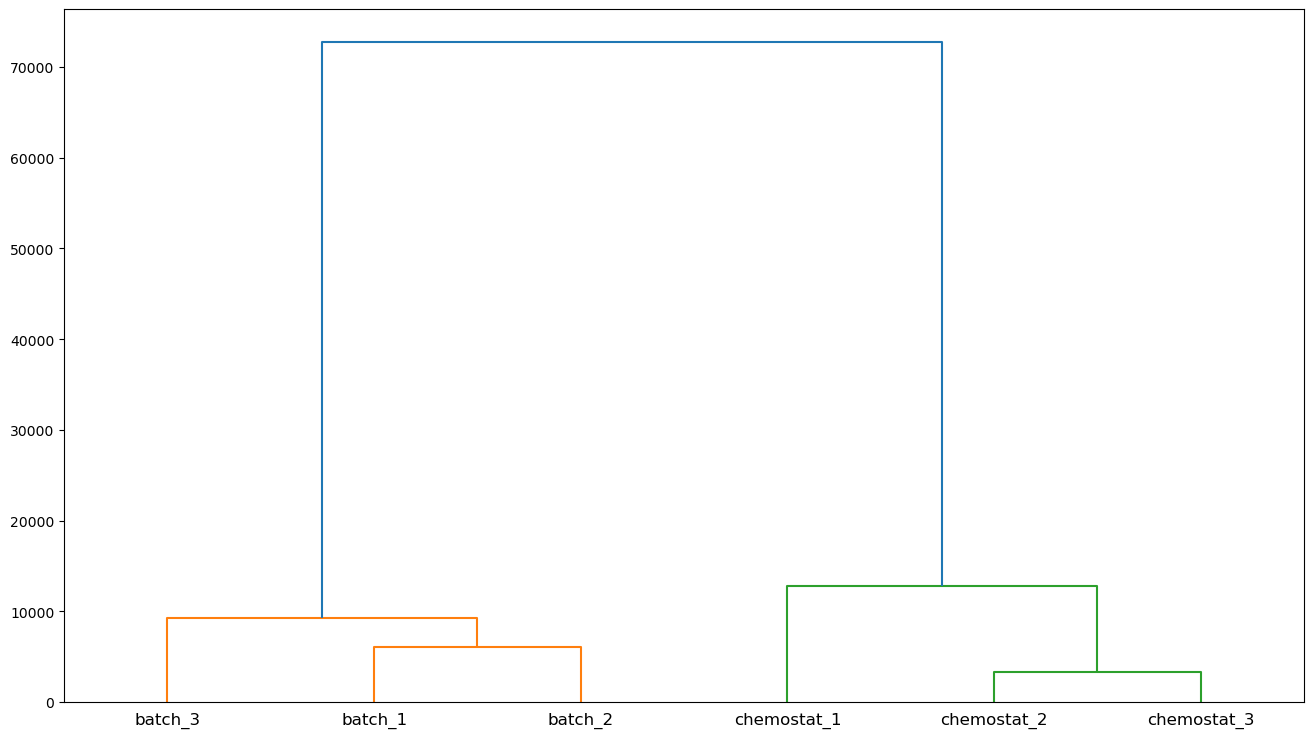

In [20]:
linkage_result=linkage(tpm_t,method='ward',metric='euclidean') #ユークリッド距離に基づいてWard法でクラスタリング
plt.figure(figsize=(16,9))
dendrogram(linkage_result,labels=list(tpm_t.index))
plt.show()

In [21]:
#-------------シングルセル解析-------------
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.io
import scipy

sns.set(style='whitegrid') #画像出力の設定

datadir="C:\\Users\\Ono Shuya\\OneDrive\\デスクトップ\\独習　Pythonバイオ情報解析\\Python_bio\\chapter10\\scRNAseq\\T0_1A"

genes=pd.read_csv(os.path.join(datadir, 'genes.tsv'),sep='\t',index_col=0,names=['GeneID','Symbol']) #遺伝子データの読み込み
display(genes)

,Symbol
GeneID,
ENSG00000243485,RP11-34P13.3
ENSG00000237613,FAM138A
ENSG00000186092,OR4F5
ENSG00000238009,RP11-34P13.7
ENSG00000239945,RP11-34P13.8
...,...
ENSG00000277856,AC233755.2
ENSG00000275063,AC233755.1
ENSG00000271254,AC240274.1


In [22]:
barcodes=np.loadtxt(os.path.join(datadir,'barcodes.tsv'),dtype='str') #numpyでtxtファイル読み込み　個別の細胞の識別バーコードデータを読み込み
barcodes[:10]

array(['AAACCGTGGCTACA-1', 'AAACGCTGTAGCGT-1', 'AAAGATCTGGTACT-1',
       'AAAGATCTTCCTTA-1', 'AAAGTTTGAGCTCA-1', 'AACAATACGACAAA-1',
       'AACAATACGCTTCC-1', 'AACCAGTGGAGGGT-1', 'AACGGTTGACGCTA-1',
       'AACGTTCTTGACCA-1'], dtype='<U16')

In [23]:
mtx=scipy.io.mmread(os.path.join(datadir,'matrix.mtx')).toarray() #疎行列mtxファイルの読み込み　各細胞について各遺伝子発現がいくつ観測されたのか
mtx

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
#genes,barcodes,mtxを１つのdfに統合
dataframe=pd.DataFrame(mtx,index=genes.index,columns=barcodes) #mtxをdfに変換し、dfのindexをGeneIDに、columnsをbarcodesにそれぞれ変換
display(dataframe.iloc[:5,:5])

,AAACCGTGGCTACA-1,AAACGCTGTAGCGT-1,AAAGATCTGGTACT-1,AAAGATCTTCCTTA-1,AAAGTTTGAGCTCA-1
GeneID,,,,,
ENSG00000243485,0,0,0,0,0
ENSG00000237613,0,0,0,0,0
ENSG00000186092,0,0,0,0,0
ENSG00000238009,0,0,0,0,0
ENSG00000239945,0,0,0,0,0


In [25]:
#他のサンプル４つも含めて、上記と同様の処理をほどこす
datadir="C:\\Users\\Ono Shuya\\OneDrive\\デスクトップ\\独習　Pythonバイオ情報解析\\Python_bio\\chapter10\\scRNAseq"
dataframes=[]

for sample_id in ['T0_1A','T2_3B','T4_5C','T6_7D','T8_9E']: #各サンプルファイル
    print(sample_id)
    
    genes=pd.read_csv(os.path.join(datadir, sample_id,'genes.tsv'),sep='\t',index_col=0,names=['GeneID','Symbol'])
    barcodes=np.loadtxt(os.path.join(datadir,sample_id,'barcodes.tsv'),dtype='str') 
    mtx=scipy.io.mmread(os.path.join(datadir,sample_id,'matrix.mtx'))
    mtx=mtx.toarray() #mtxを表示するためにnumpy配列へ変換
    dataframe=pd.DataFrame(mtx,index=genes.index,columns=barcodes)
    
    print('\t',dataframe.shape)
    dataframes.append(dataframe) #各dfを格納

T0_1A
	 (33694, 464)
T2_3B
	 (33694, 737)
T4_5C
	 (33694, 624)
T6_7D
	 (33694, 656)
T8_9E
	 (33694, 632)


In [26]:
#dataframesを１つのdfに統合
sample_labels=['Days0-3','Days6-9','Days12-15','Days18-21','Days24-27'] #統合後に各データが由来するファイルが分かるようにlabelを作成
df=pd.concat(dataframes,axis=1,keys=sample_labels) #axis=1で横方向に連結、keysでグループ指定
print('Total'+str(len(df))+'genes', str(len(df.columns))+'cells')
df

Total33694genes 3113cells


Days0-3                                    \
                AAACCGTGGCTACA-1 AAACGCTGTAGCGT-1 AAAGATCTGGTACT-1   
GeneID                                                               
ENSG00000243485                0                0                0   
ENSG00000237613                0                0                0   
ENSG00000186092                0                0                0   
ENSG00000238009                0                0                0   
ENSG00000239945                0                0                0   
...                          ...              ...              ...   
ENSG00000277856                0                0                0   
ENSG00000275063                0                0                0   
ENSG00000271254                0                0                0   
ENSG00000277475                0                0                0   
ENSG00000268674                0                0                0   

                                                                    \
                AAAGATCTTCCTTA-1 AAAGTTTGAGCTCA-1 AACAATACGACAAA-1   
GeneID                                                               
ENSG00000243485                0                0                0   
ENSG00000237613                0                0                0   
ENSG00000186092                0                0                0   
ENSG00000238009                0                0                0   
ENSG00000239945                0                0                0   
...                          ...              ...              ...   
ENSG00000277856                0                0                0   
ENSG00000275063                0                0                0   
ENSG00000271254                0                0                0   
ENSG00000277475                0                0                0   
ENSG00000268674                0                0                0   

                                                                    \
                AACAATACGCTTCC-1 AACCAGTGGAGGGT-1 AACGGTTGACGCTA-1   
GeneID                                                               
ENSG00000243485                0                0                0   
ENSG00000237613                0                0                0   
ENSG00000186092                0                0                0   
ENSG00000238009                0                0                0   
ENSG00000239945                0                0                0   
...                          ...              ...              ...   
ENSG00000277856                0                0                0   
ENSG00000275063                0                0                0   
ENSG00000271254                0                0                0   
ENSG00000277475                0                0                0   
ENSG00000268674                0                0                0   

                                  ...        Days24-27                   \
                AACGTTCTTGACCA-1  ... TTGCTAACTCGTTT-1 TTGGTACTCGATAC-1   
GeneID                            ...                                     
ENSG00000243485                0  ...                0                0   
ENSG00000237613                0  ...                0                0   
ENSG00000186092                0  ...                0                0   
ENSG00000238009                0  ...                0                0   
ENSG00000239945                0  ...                0                0   
...                          ...  ...              ...              ...   
ENSG00000277856                0  ...                0                0   
ENSG00000275063                0  ...                0                0   
ENSG00000271254                0  ...                0                0   
ENSG00000277475                0  ...                0                0   
ENSG00000268674                0  ...                0                0   

                               

In [27]:
#クオリティコントロール（細胞と遺伝子のフィルタリング）
genes_zero_values=df.index[df.values.sum(axis=1)==0] #いずれの細胞でも発現量が0の遺伝子のindex  sum(axis=1)は横方向の和  
df.drop(genes_zero_values,inplace=True) #dfからgenes_zero_valuesを削除  inplace=Trueで削除後のdfに置き換わる
print('After filtering:', len(df), 'genes')

After filtering: 20155 genes


In [28]:
counts=df.values.sum(axis=0) #細胞ごとに発現遺伝子の和をとる
n_genes=(df.values>0.0).astype(int).sum(axis=0) #それぞれの細胞について、わずかでも検出された遺伝子の種類がいくつあるか  astype(int)で{0,1}に変換

print('Stats for counts:','max=',np.max(counts), #発現遺伝子の数について
      'min=',np.min(counts),
      'average=',round(np.average(counts),2))

print('Stats for detected genes:','max=',np.max(n_genes), #検出された遺伝子の種類について
      'min=',np.min(n_genes),
      'average=',round(np.average(n_genes),2))

Stats for counts: max= 28927 min= 940 average= 4637.68
Stats for detected genes: max= 4656 min= 237 average= 1568.44


In [29]:
display(genes.loc[genes['Symbol'].str.startswith('MT-'),:]) #遺伝子シンボルが「MT-」で始まるミトコンドリア遺伝子
mito_genes_index=genes.index[genes['Symbol'].str.startswith('MT-')] #ミトコンドリア遺伝子のindex
percent_mito=100.0*df.loc[mito_genes_index,:].values.sum(axis=0)/df.values.sum(axis=0)#細胞ごとの発現遺伝子について、ミトコンドリア遺伝子が占める割合

,Symbol
GeneID,
ENSG00000198888,MT-ND1
ENSG00000198763,MT-ND2
ENSG00000198804,MT-CO1
ENSG00000198712,MT-CO2
ENSG00000228253,MT-ATP8
ENSG00000198899,MT-ATP6
ENSG00000198938,MT-CO3
ENSG00000198840,MT-ND3
ENSG00000212907,MT-ND4L


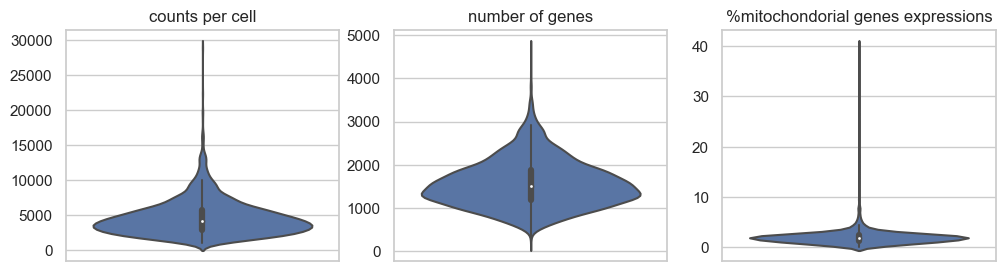

In [30]:
#バイオリンプロットでの可視化
fig=plt.figure(figsize=(12,3))

ax1=plt.subplot(1,3,1)
sns.violinplot(y=counts,ax=ax1).set_title('counts per cell')
ax2=plt.subplot(1,3,2)
sns.violinplot(y=n_genes,ax=ax2).set_title('number of genes')
ax3=plt.subplot(1,3,3)
sns.violinplot(y=percent_mito,ax=ax3).set_title('%mitochondorial genes expressions')
plt.show()

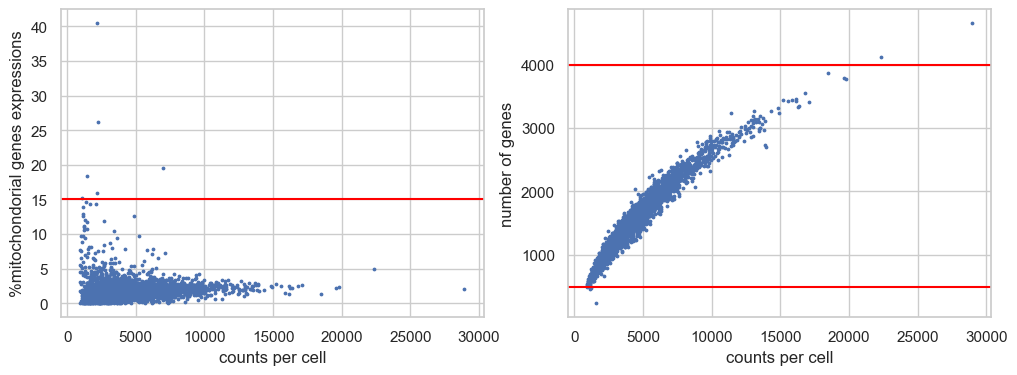

In [31]:
#countsとpercent_mito、countsとn_genesの２つの組み合わせについて散布図を描く
#フィルタリングの閾値
min_genes=500
max_genes=4000
mito_threshold=15

fig=plt.figure(figsize=(12,4))
ax1=plt.subplot(1,2,1)
ax1.scatter(counts,percent_mito,s=3) #横軸counts、縦軸percent_mitoの散布図
ax1.axhline(y=mito_threshold,color='red') #縦軸の閾値
ax1.set_xlabel('counts per cell')
ax1.set_ylabel('%mitochondorial genes expressions')

ax2=plt.subplot(1,2,2)
ax2.scatter(counts,n_genes,s=3) #横軸counts、縦軸n_genesの散布図
ax2.axhline(y=min_genes,color='red') #縦軸の閾値
ax2.axhline(y=max_genes,color='red') #縦軸の閾値
ax2.set_xlabel('counts per cell')
ax2.set_ylabel('number of genes')

plt.show()

In [32]:
#検出遺伝子数501以上4000未満、ミトコンドリア遺伝子発現割合が15%未満の細胞を抽出
print('before filtering:',len(df.columns))
filtered_cells=df.columns[(n_genes>min_genes)&
                          (n_genes<max_genes)&
                          (percent_mito<mito_threshold)]
df_filtered=df.loc[:,filtered_cells]
print('after filtering:',len(df_filtered.columns))

before filtering: 3113
after filtering: 3102


In [33]:
#各細胞の遺伝子発現量を正規化
normalized=10000*df_filtered.values/df_filtered.values.sum(axis=0) #割合を計算した後、値が小さくなりすぎないように10000をかけて正規化
lognormalized=np.log1p(normalized) #全体に1を足してlogをとることで、分散安定化を行う
df_lognormalized=pd.DataFrame(lognormalized,index=df_filtered.index,columns=df_filtered.columns)
df_lognormalized

Days0-3                                    \
                AAACCGTGGCTACA-1 AAACGCTGTAGCGT-1 AAAGATCTGGTACT-1   
GeneID                                                               
ENSG00000279457              0.0              0.0              0.0   
ENSG00000228463              0.0              0.0              0.0   
ENSG00000237491              0.0              0.0              0.0   
ENSG00000225880              0.0              0.0              0.0   
ENSG00000230368              0.0              0.0              0.0   
...                          ...              ...              ...   
ENSG00000276256              0.0              0.0              0.0   
ENSG00000273748              0.0              0.0              0.0   
ENSG00000278817              0.0              0.0              0.0   
ENSG00000276345              0.0              0.0              0.0   
ENSG00000271254              0.0              0.0              0.0   

                                                                    \
                AAAGATCTTCCTTA-1 AAAGTTTGAGCTCA-1 AACAATACGACAAA-1   
GeneID                                                               
ENSG00000279457         0.000000              0.0              0.0   
ENSG00000228463         0.559562              0.0              0.0   
ENSG00000237491         0.000000              0.0              0.0   
ENSG00000225880         0.000000              0.0              0.0   
ENSG00000230368         0.000000              0.0              0.0   
...                          ...              ...              ...   
ENSG00000276256         0.000000              0.0              0.0   
ENSG00000273748         0.000000              0.0              0.0   
ENSG00000278817         0.000000              0.0              0.0   
ENSG00000276345         0.000000              0.0              0.0   
ENSG00000271254         0.000000              0.0              0.0   

                                                                    \
                AACAATACGCTTCC-1 AACGGTTGACGCTA-1 AACGTTCTTGACCA-1   
GeneID                                                               
ENSG00000279457              0.0         0.000000              0.0   
ENSG00000228463              0.0         0.000000              0.0   
ENSG00000237491              0.0         0.000000              0.0   
ENSG00000225880              0.0         0.000000              0.0   
ENSG00000230368              0.0         0.000000              0.0   
...                          ...              ...              ...   
ENSG00000276256              0.0         0.000000              0.0   
ENSG00000273748              0.0         0.000000              0.0   
ENSG00000278817              0.0         1.024161              0.0   
ENSG00000276345              0.0         0.000000              0.0   
ENSG00000271254              0.0         0.000000              0.0   

                                  ...        Days24-27                   \
                AACTACCTTTACTC-1  ... TTGCTAACTCGTTT-1 TTGGTACTCGATAC-1   
GeneID                            ...                                     
ENSG00000279457              0.0  ...         0.000000         0.000000   
ENSG00000228463              0.0  ...         1.245666         1.217487   
ENSG00000237491              0.0  ...         0.000000         0.000000   
ENSG00000225880              0.0  ...         0.000000         0.000000   
ENSG00000230368              0.0  ...         0.000000         0.000000   
...                          ...  ...              ...              ...   
ENSG00000276256              0.0  ...         0.000000         0.000000   
ENSG00000273748              0.0  ...         0.000000         0.000000   
ENSG00000278817              0.0  ...         0.000000         0.000000   
ENSG00000276345              0.0  ...         0.000000         0.000000   
ENSG00000271254              0.0  ...         0.000000         0.000000   

                               

In [34]:
#分散平均比で細胞間における発現量変動の大きさを比較
mean_expressions=np.expm1(df_lognormalized.values).mean(axis=1) #対数変換されたデータをexpで戻して各遺伝子の平均発現量を計算
mean_expressions[mean_expressions==0]=1e-12 #0除算エラーを避けるために小さな値を設定
log_mean_expressions=np.log1p(mean_expressions) #再度、対数変換
genes_stats=pd.DataFrame(log_mean_expressions,
                         index=df_lognormalized.index,
                         columns=['AverageExpr'])

dispersion=np.expm1(df_lognormalized.values).var(axis=1)/mean_expressions #分散を平均で割る
dispersion[dispersion==0]=np.nan #0を欠損値NANに変換
dispersion=np.log(dispersion) 
genes_stats['Dispersion']=dispersion #dfに列を追加

display(genes_stats)

,AverageExpr,Dispersion
GeneID,,
ENSG00000279457,0.075988,1.212506
ENSG00000228463,0.252027,1.320413
ENSG00000237491,0.035718,1.290543
ENSG00000225880,0.012935,1.134635
ENSG00000230368,0.013035,0.978580
...,...,...
ENSG00000276256,0.064338,1.143503
ENSG00000273748,0.002690,1.094374
ENSG00000278817,0.101791,1.232052


(2000, 3102)


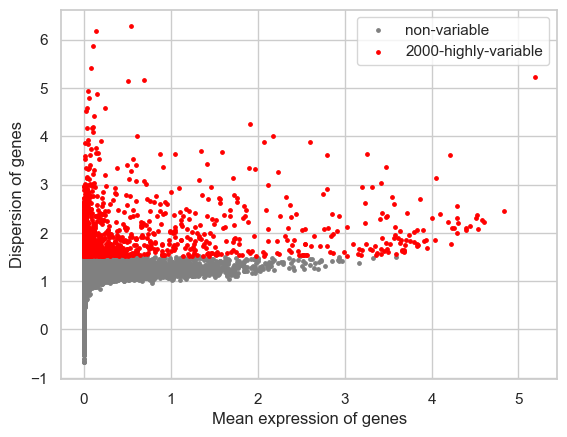

In [35]:
#Dispersionの上位2000項目の遺伝子を取り出す
n_highly_variable=2000

genes_disp=genes_stats.sort_values(by=['Dispersion'],ascending=False) #Dispersionの値で降順にソート
highly_variable_genes=genes_disp.head(n_highly_variable).index #上位2000の遺伝子のindex
isHVG=genes_stats.index.isin(highly_variable_genes) #HVG(Highly Variable Genes)であるか否かの真偽値を設定

df_HVGs=df_lognormalized.loc[isHVG,:] #正規化テーブルからHVG項目を抽出
print(df_HVGs.shape)

fig,ax=plt.subplots()
ax.scatter(genes_stats.loc[~isHVG,'AverageExpr'], #HGCでない(~isHVG)遺伝子のみを灰色でプロット
           genes_stats.loc[~isHVG,'Dispersion'],
           c='grey',s=6,label='non-variable') 
ax.scatter(genes_stats.loc[isHVG,'AverageExpr'],  #HVGである遺伝子のみを赤色でプロット
           genes_stats.loc[isHVG,'Dispersion'],
           c='red',s=6,label='2000-highly-variable') 

ax.set_xlabel('Mean expression of genes')
ax.set_ylabel('Dispersion of genes')
plt.legend() #labelの凡例を表示
plt.show()

In [36]:
#データの標準化
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_values=scaler.fit_transform(df_HVGs.values.T) #標準化 縦軸で行われるので.Tで逆行列に変換
scaled_values=np.clip(scaled_values,None,10) #外れ値を考慮して、10以上の値を10にする
df_scaled=pd.DataFrame(scaled_values.T,index=df_HVGs.index,columns=df_HVGs.columns)
df_scaled

Days0-3                                    \
                AAACCGTGGCTACA-1 AAACGCTGTAGCGT-1 AAAGATCTGGTACT-1   
GeneID                                                               
ENSG00000272512        -0.027669        -0.027669        -0.027669   
ENSG00000188290        -0.427372        -0.427372        -0.427372   
ENSG00000186827        -0.030594        -0.030594        -0.030594   
ENSG00000189409        -0.254897        -0.254897        -0.254897   
ENSG00000187730        -0.046916        -0.046916        -0.046916   
...                          ...              ...              ...   
ENSG00000198899        -0.365704         0.997345         0.339922   
ENSG00000198938        -0.533672         0.745560         0.832753   
ENSG00000198886        -0.418398         0.421709         0.570560   
ENSG00000198786         0.634870         0.393310         0.185976   
ENSG00000198727        -0.258619         0.696863         0.716832   

                                                                    \
                AAAGATCTTCCTTA-1 AAAGTTTGAGCTCA-1 AACAATACGACAAA-1   
GeneID                                                               
ENSG00000272512        -0.027669        -0.027669        -0.027669   
ENSG00000188290        -0.427372        -0.427372        -0.427372   
ENSG00000186827        -0.030594        -0.030594        -0.030594   
ENSG00000189409        -0.254897        -0.254897        -0.254897   
ENSG00000187730        -0.046916        -0.046916        -0.046916   
...                          ...              ...              ...   
ENSG00000198899         1.044411         1.217855        -1.959372   
ENSG00000198938         0.703793         0.584204        -1.603347   
ENSG00000198886         0.808278         0.542591        -2.887846   
ENSG00000198786         0.178118         0.874331        -1.091888   
ENSG00000198727         0.325844         0.290910        -2.749208   

                                                                    \
                AACAATACGCTTCC-1 AACGGTTGACGCTA-1 AACGTTCTTGACCA-1   
GeneID                                                               
ENSG00000272512        -0.027669        -0.027669        -0.027669   
ENSG00000188290        -0.427372        -0.427372        -0.427372   
ENSG00000186827        -0.030594        -0.030594        -0.030594   
ENSG00000189409        -0.254897        -0.254897        -0.254897   
ENSG00000187730        -0.046916        -0.046916        -0.046916   
...                          ...              ...              ...   
ENSG00000198899         0.932904         2.140067         1.259924   
ENSG00000198938         1.532229         1.716817         0.481427   
ENSG00000198886         1.836995         1.622570         0.891052   
ENSG00000198786         0.711466         1.712194         0.761793   
ENSG00000198727         1.117630         1.828283         0.403891   

                                  ...        Days24-27                   \
                AACTACCTTTACTC-1  ... TTGCTAACTCGTTT-1 TTGGTACTCGATAC-1   
GeneID                            ...                                     
ENSG00000272512        -0.027669  ...        -0.027669        -0.027669   
ENSG00000188290        -0.427372  ...        -0.427372        -0.427372   
ENSG00000186827        -0.030594  ...        -0.030594        -0.030594   
ENSG00000189409        -0.254897  ...        -0.254897         5.528538   
ENSG00000187730        -0.046916  ...        -0.046916        -0.046916   
...                          ...  ...              ...              ...   
ENSG00000198899         0.243423  ...         1.170885         0.125466   
ENSG00000198938         0.714264  ...         0.073247         0.034147   
ENSG00000198886         0.609609  ...         0.662161         0.350080   
ENSG00000198786        -0.049014  ...         0.250421        -1.091888   
ENSG00000198727         0.960238  ...         0.316683         0.624345   

                               

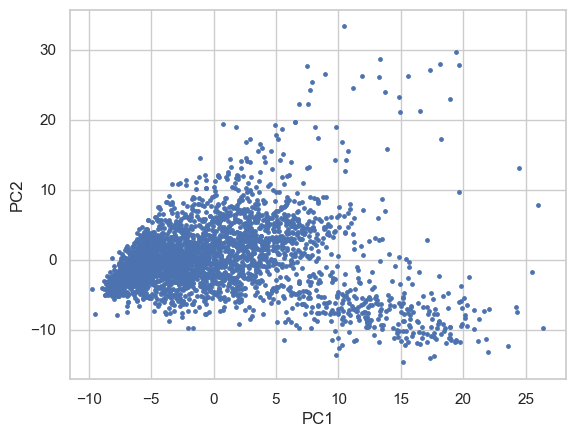

In [37]:
#主成分分析
import sklearn.decomposition
pca_model=sklearn.decomposition.PCA(n_components=2) #第一主成分、第二主成分のみを使う主成分分析
pca_model.fit(df_scaled.values.T) #sklearnのモデルは観測値（細胞）×特徴量（遺伝子）の行列を入力するので、転置して入力
pca_coords=pca_model.transform(df_scaled.values.T) 

fig,ax=plt.subplots()
ax.scatter(pca_coords[:,0],pca_coords[:,1],s=6)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.show()

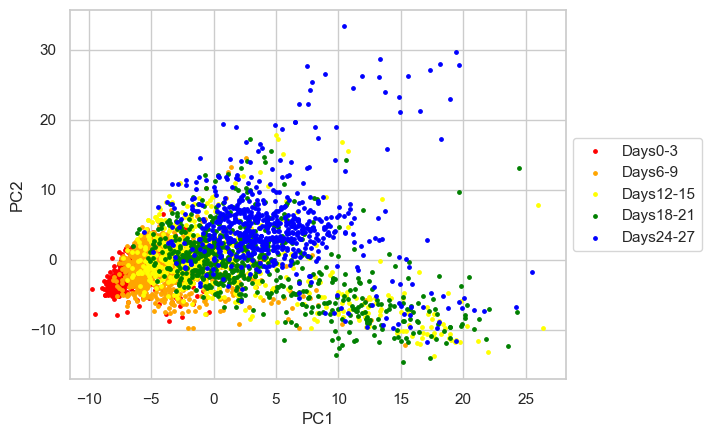

In [38]:
sample_labels=['Days0-3','Days6-9','Days12-15','Days18-21','Days24-27']
label_to_colors={'Days0-3':'red',    #ラベルと対応する色を辞書型で定義
                 'Days6-9':'orange',
                 'Days12-15':'yellow',
                 'Days18-21':'green',
                 'Days24-27':'blue'}

fig,ax=plt.subplots()
for label in sample_labels:
    cell_mask=df_scaled.columns.get_level_values(0)==label #df_scaledの0番レベルに格納されたラベル情報とlabel変数が一致するかの真偽値リスト
    ax.scatter(pca_coords[cell_mask,0],     #pca_coordsの行について、対応するもののみをプロット
               pca_coords[cell_mask,1],
               color=label_to_colors[label],
               label=label,s=6)
    
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend(loc='center left',bbox_to_anchor=(1,0.5)) #位置を調整してlabelの凡例を表示
plt.show()

In [39]:
#細胞ラベルごとに色を塗り分ける関数
def myplot(ax,coords,label_x,label_y):
    for label in sample_labels:
        cell_mask=df_scaled.columns.get_level_values(0)==label 
        ax.scatter(coords[cell_mask,0], 
                   coords[cell_mask,1],
                   color=label_to_colors[label],
                   label=label,s=6)
    
    ax.set_xlabel(label_x)
    ax.set_ylabel(label_y)

In [40]:
#それぞれの主成分の寄与率
pca_model.explained_variance_ratio_

array([0.03517091, 0.02212961])

In [41]:
#50個の主成分で次元削減
PCs=50 #主成分の数

pca=sklearn.decomposition.PCA(n_components=PCs) 
pcscores=pca.fit_transform(df_scaled.values.T) 
df_pc=pd.DataFrame(pcscores,index=df_scaled.columns,columns=['PC'+str(i+1) for i in range(PCs)]) #行が細胞、列が主成分
display(df_pc.iloc[:5,:5])

PC1       PC2        PC3       PC4       PC5
Days0-3 AAACCGTGGCTACA-1 -7.972695 -3.564716   5.242470  0.524535  1.228562
        AAACGCTGTAGCGT-1 -7.606931 -4.558112  10.092944 -1.665808  0.263679
        AAAGATCTGGTACT-1 -7.491873 -3.032769   5.793508 -0.927033  0.203842
        AAAGATCTTCCTTA-1 -7.323264 -2.726932  10.319604 -3.176212  1.193411
        AAAGTTTGAGCTCA-1 -8.232689 -3.528740   6.255281 -1.737008 -0.677575

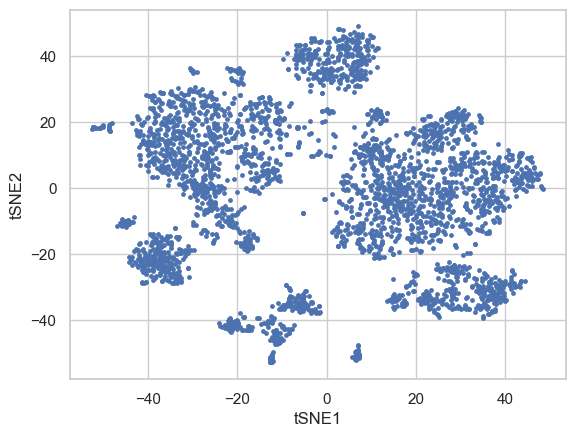

In [42]:
#t-SNEの実装
from sklearn.manifold import TSNE

tsne_model=TSNE(n_components=2,init='pca') #２次元に圧縮、初期配置はランダムではなくPCAの結果で決める
tsne_coords=tsne_model.fit_transform(df_pc.values)

fig,ax=plt.subplots()
ax.scatter(tsne_coords[:,0],tsne_coords[:,1],s=6)
ax.set_xlabel('tSNE1')
ax.set_ylabel('tSNE2')
plt.show()

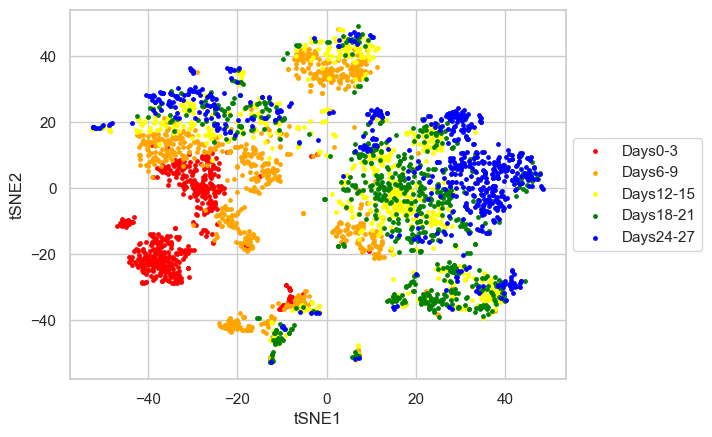

In [43]:
fig,ax=plt.subplots()
myplot(ax,tsne_coords,label_x='tSNE1',label_y='tSNE2')
ax.legend(loc='center left',bbox_to_anchor=(1,0.5))
plt.show()

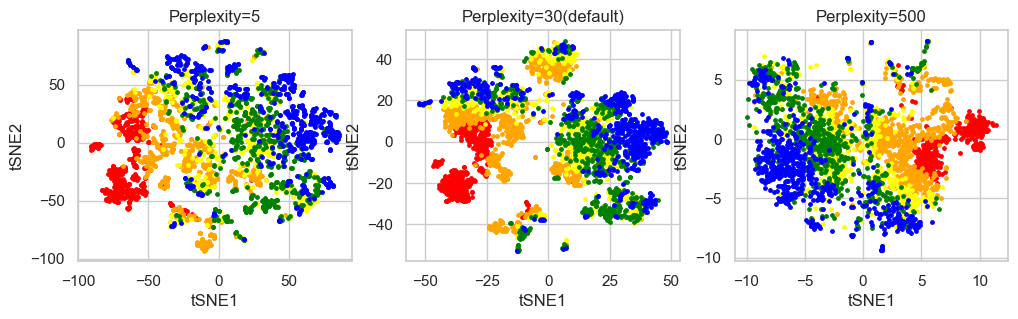

In [44]:
#t-SNEのPerplexityを5、30（デフォルト）、500にして比較
tsne_model_perp5=TSNE(n_components=2,init='pca',perplexity=5) 
tsne_coords_perp5=tsne_model_perp5.fit_transform(df_pc.values)
tsne_model_perp500=TSNE(n_components=2,init='pca',perplexity=500) 
tsne_coords_perp500=tsne_model_perp500.fit_transform(df_pc.values)

fig=plt.figure(figsize=(12,3))

ax1=fig.add_subplot(1,3,1)
myplot(ax1,tsne_coords_perp5,label_x='tSNE1',label_y='tSNE2')
ax1.set_title('Perplexity=5')

ax2=fig.add_subplot(1,3,2)
myplot(ax2,tsne_coords,label_x='tSNE1',label_y='tSNE2')
ax2.set_title('Perplexity=30(default)')

ax3=fig.add_subplot(1,3,3)
myplot(ax3,tsne_coords_perp500,label_x='tSNE1',label_y='tSNE2')
ax3.set_title('Perplexity=500')

plt.show()

In [45]:
top100_gene_index=df_HVGs.var(axis=1).sort_values(ascending=False).index[:100] #df_HVGsから、分散（発現量変動）の大きい上位100個の遺伝子を取り出す
df_for_hclust=df_HVGs.loc[top100_gene_index,:]

random_cell_index=np.random.choice(len(df_for_hclust.columns),100,replace=False) #さらに、細胞をランダムに100個取り出す
df_for_hclust=df_for_hclust.iloc[:,random_cell_index]
df_for_hclust

Days24-27                         Days18-21  \
                CACCGTACAAGCCT-1 AACACTCTAGCGTT-1 ATCCCGTGTTCGGA-1   
GeneID                                                               
ENSG00000011465         0.000000         0.000000         0.000000   
ENSG00000111057         0.000000         1.523463         0.000000   
ENSG00000139329         0.000000         3.785485         1.566087   
ENSG00000170421         0.000000         0.000000         2.148939   
ENSG00000134333         4.108254         2.731269         1.566087   
...                          ...              ...              ...   
ENSG00000106211         0.000000         0.000000         0.000000   
ENSG00000144381         0.000000         1.523463         0.000000   
ENSG00000102265         0.000000         0.000000         1.566087   
ENSG00000123416         2.660111         3.936388         3.443715   
ENSG00000142871         0.000000         2.465066         0.000000   

                       Days24-27                         Days18-21  \
                TGAGTCGAAAGAGT-1 AGCGGCACTCAGGT-1 TAAGGCTGAAGGCG-1   
GeneID                                                               
ENSG00000011465         0.000000         0.000000         1.793428   
ENSG00000111057         0.000000         0.000000         1.793428   
ENSG00000139329         1.621058         2.805053         0.000000   
ENSG00000170421         0.000000         0.000000         0.000000   
ENSG00000134333         2.210128         2.170650         1.793428   
...                          ...              ...              ...   
ENSG00000106211         0.000000         2.170650         2.399715   
ENSG00000144381         0.000000         0.000000         2.399715   
ENSG00000102265         1.621058         0.000000         0.000000   
ENSG00000123416         1.621058         4.144908         3.933788   
ENSG00000142871         1.621058         0.000000         0.000000   

                       Days24-27        Days18-21        Days24-27  \
                AAGTCTCTCTCCAC-1 CCTTCACTTCGCCT-1 GAAAGATGGTACAC-1   
GeneID                                                               
ENSG00000011465         0.000000         0.000000         2.868018   
ENSG00000111057         0.000000         4.984022         0.000000   
ENSG00000139329         2.441754         1.873129         3.928021   
ENSG00000170421         0.000000         4.178492         0.000000   
ENSG00000134333         0.000000         2.753003         3.532349   
...                          ...              ...              ...   
ENSG00000106211         2.917156         0.000000         0.000000   
ENSG00000144381         0.000000         2.486344         2.490563   
ENSG00000102265         0.000000         1.873129         1.877025   
ENSG00000123416         4.262039         4.530560         2.868018   
ENSG00000142871         2.441754         1.541677         0.000000   

                       Days12-15  ...          Days6-9        Days12-15  \
                AAAGTTTGTCGACA-1  ... ACTAGGTGTGGATC-1 GGACCGTGCTCATT-1   
GeneID                            ...                                     
ENSG00000011465         0.000000  ...         0.000000         4.456268   
ENSG00000111057         2.070250  ...         0.000000         1.937557   
ENSG00000139329         1.196627  ...         0.000000         3.882268   
ENSG00000170421         2.698243  ...         0.000000         3.424551   
ENSG00000134333         3.357149  ...         2.280302         2.935202   
...                          ...  ...              ...              ...   
ENSG00000106211         0.000000  ...         1.684511         1.937557   
ENSG00000144381         1.196627  ...         1.684511         1.937557   
ENSG00000102265         0.000000  ...         1.684511         2.188561   
ENSG00000123416         3.901723  ...         3.308310         1.601644   
ENSG00000142871         0.000000  ...         2.651088         1.092121   

                         Days

In [46]:
cell_labels=df_for_hclust.columns.get_level_values(0) #細胞の日付ラベルを取得
cell_colors=[label_to_colors[label] for label in cell_labels] #ラベルを色に変換

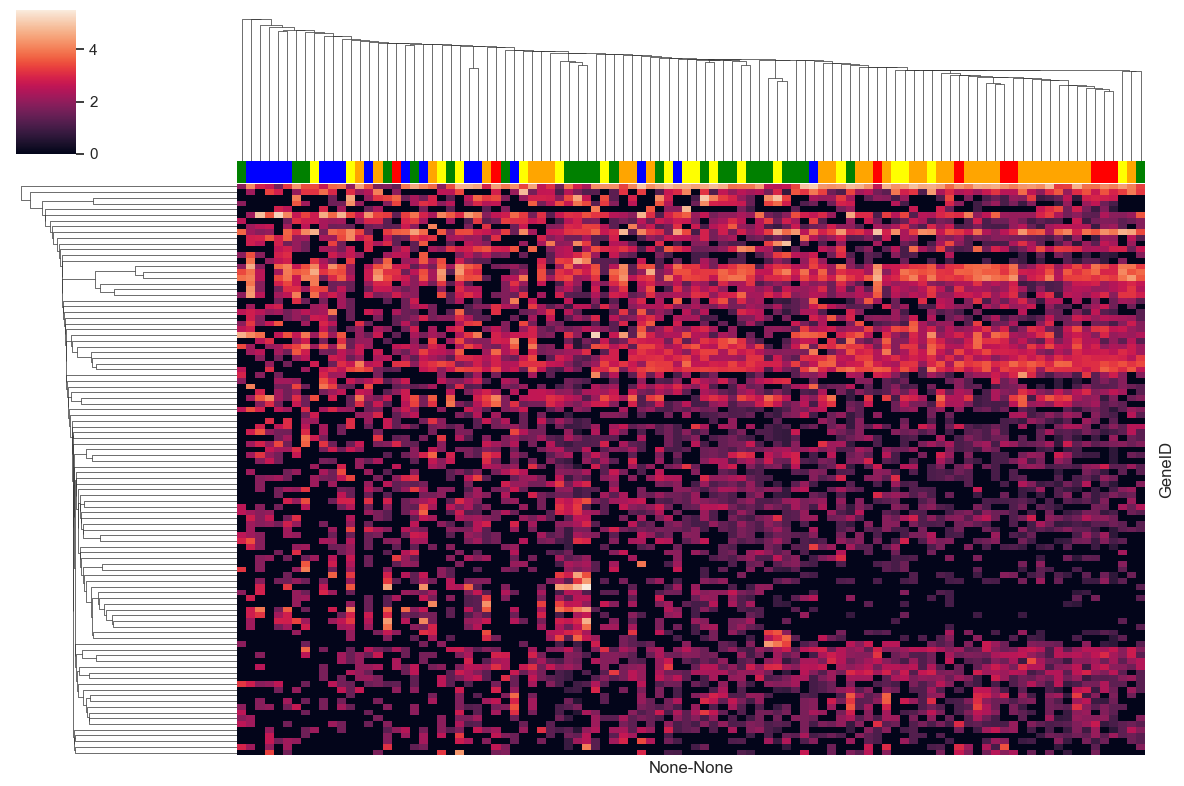

In [47]:
#クラスタリング
sns.clustermap(df_for_hclust,method='single',metric='euclidean',xticklabels=False,yticklabels=False,col_colors=cell_colors,figsize=(12,8)) #single-linkage、ユークリッド距離でクラスタリング

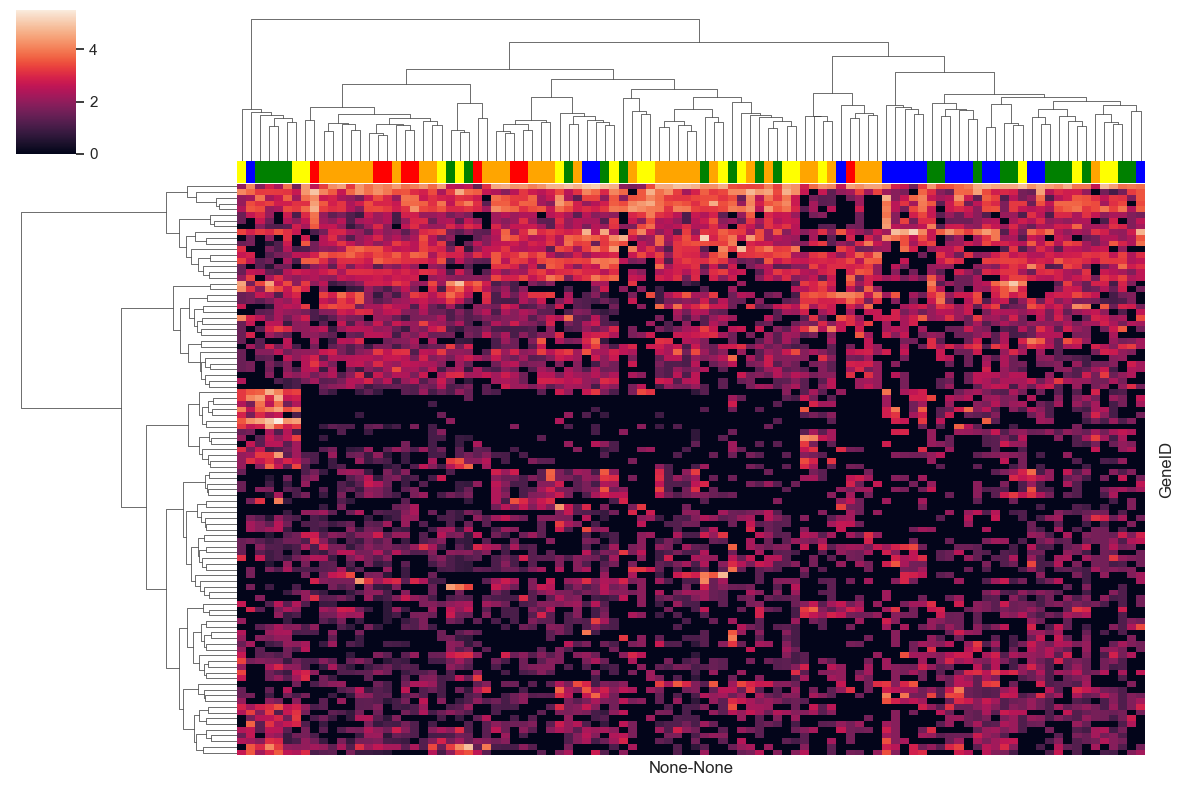

In [48]:
#ウォード法でクラスタリング
sns.clustermap(df_for_hclust,method='ward',metric='euclidean',xticklabels=False,yticklabels=False,col_colors=cell_colors,figsize=(12,8)) 

In [49]:
#遺伝子IDを遺伝子名に変換
df_for_hclust['Gene symbol']=genes.loc[df_for_hclust.index,'Symbol'] #genesから情報を取り出す
df_for_hclust=df_for_hclust.set_index('Gene symbol') #Gene symbolをindexにする
display(df_for_hclust.iloc[:5,:5])

Days24-27                         Days18-21  \
            CACCGTACAAGCCT-1 AACACTCTAGCGTT-1 ATCCCGTGTTCGGA-1   
Gene symbol                                                      
DCN                 0.000000         0.000000         0.000000   
KRT18               0.000000         1.523463         0.000000   
LUM                 0.000000         3.785485         1.566087   
KRT8                0.000000         0.000000         2.148939   
LDHA                4.108254         2.731269         1.566087   

                   Days24-27                   
            TGAGTCGAAAGAGT-1 AGCGGCACTCAGGT-1  
Gene symbol                                    
DCN                 0.000000         0.000000  
KRT18               0.000000         0.000000  
LUM                 1.621058         2.805053  
KRT8                0.000000         0.000000  
LDHA                2.210128         2.170650

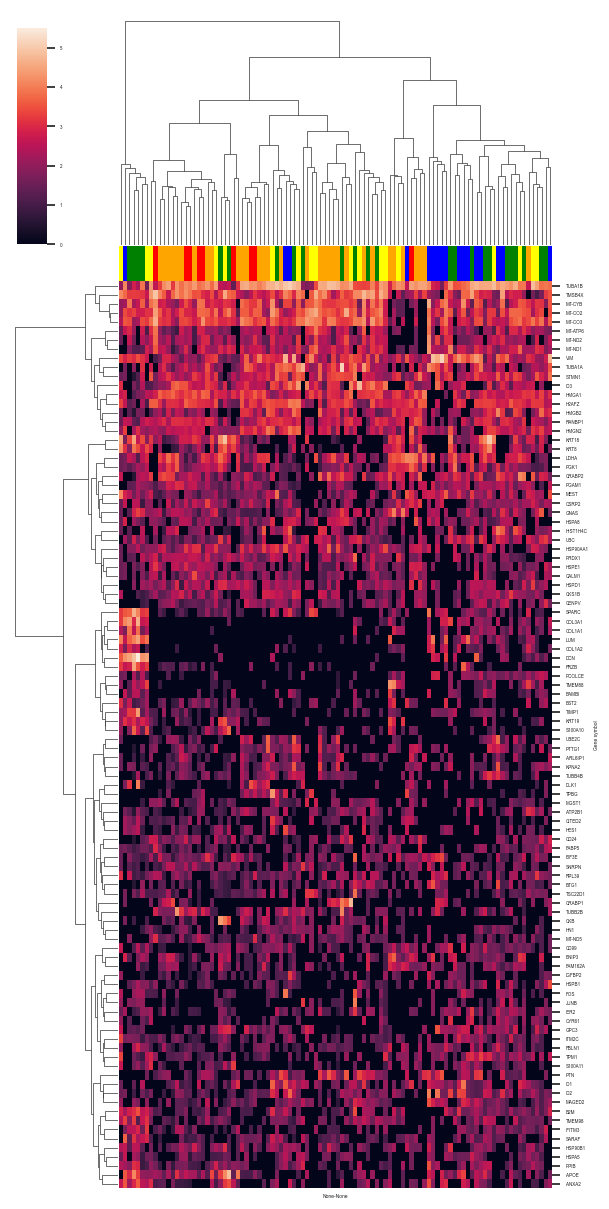

In [50]:
#遺伝子名を表示したヒートマップ
sns.set(font_scale=0.3) #フォントサイズ
sns.clustermap(df_for_hclust,method='ward',metric='euclidean',
               xticklabels=False,col_colors=cell_colors,figsize=(6,12)) 

In [51]:
#k-meansクラスタリング
import sklearn.cluster

kmeans_model=sklearn.cluster.KMeans(n_clusters=2,init='k-means++')
clusters=kmeans_model.fit_predict(df_scaled.values.T)

print(clusters)
print('cluster-0:',np.count_nonzero(clusters==0), #np.count_nonzeroでカウントする
      'cluster-1:',np.count_nonzero(clusters==1)) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 ... 1 1 1]
cluster-0: 2047 cluster-1: 1055


In [52]:
#t-SNEで次元削減し、クラスタリング結果を２次元で描画
tsne_model=TSNE(n_components=2,init='pca')
tsne_coords=tsne_model.fit_transform(df_scaled.values.T)

sns.set(font_scale=1)
colors=[x for x in matplotlib.cm.tab20.colors] #クラスタの色のリスト matplotlib.cm.tab20.colorsは20色

def plot_clusters(coords,clusters,ax): #次元削減したデータのクラスタリング結果を描画する関数
    for cluster_id in np.unique(clusters):
        ax.scatter(coords[clusters==cluster_id,0], #clustersが該当するcluster_idの座標のみを取り出してプロット
                   coords[clusters==cluster_id,1],
                   s=6,color=colors[cluster_id])
    
    for cluster_id in np.unique(clusters):
        centroid=np.mean(coords[clusters==cluster_id,:],axis=0) #クラスタに属する座標の平均
        ax.annotate(str(cluster_id), #cluster_idのテキストを描画
                    xy=(centroid),fontsize=13,color='white',
                    bbox={'facecolor':colors[cluster_id],
                          'edgecolor':'black'})

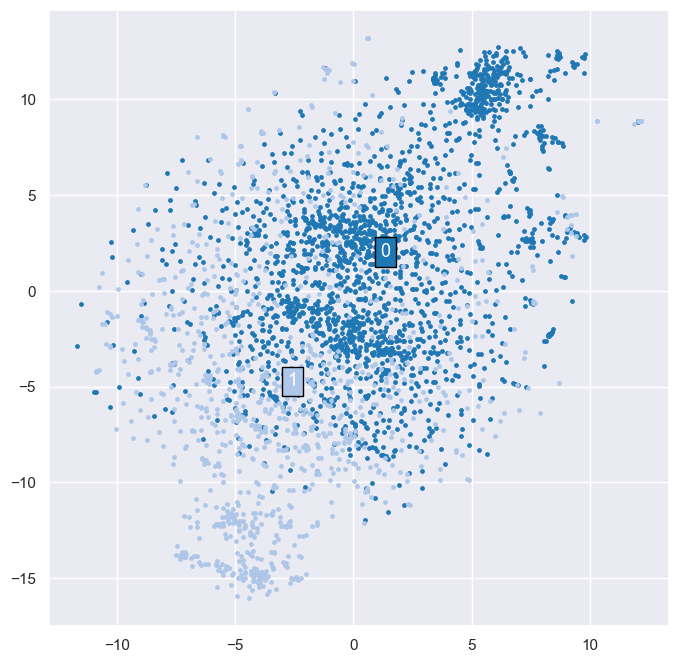

In [53]:
fig,ax=plt.subplots(figsize=(8,8))
plot_clusters(tsne_coords,clusters,ax)
plt.show()

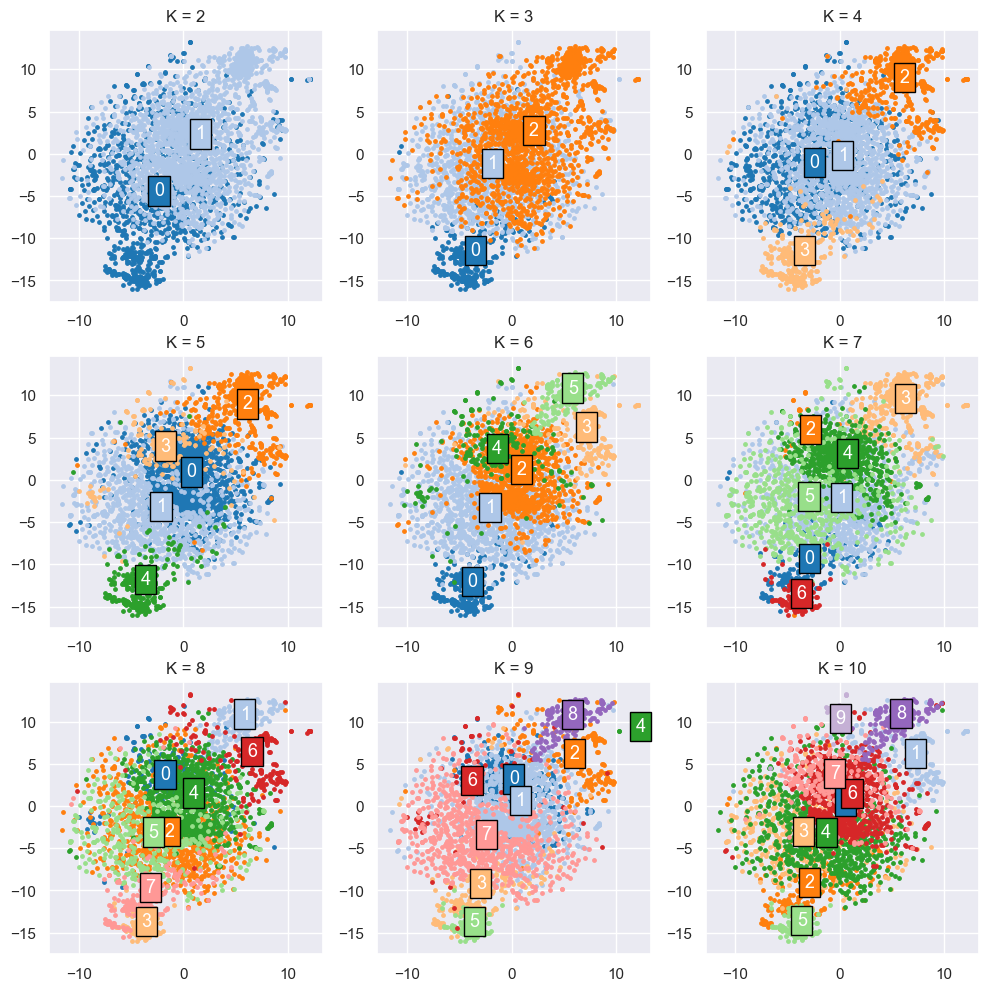

In [54]:
#クラスタ数を2から10まで変化させて再度実行
fig=plt.figure(figsize=(12,12))

for i, n_clusters in enumerate(range(2,11)):
    kmeans_model=sklearn.cluster.KMeans(n_clusters=n_clusters,init='k-means++',n_init=10)
    clusters=kmeans_model.fit_predict(df_scaled.values.T)
    ax=fig.add_subplot(3,3,i+1)
    plot_clusters(tsne_coords,clusters,ax)
    ax.set_title('K = '+str(n_clusters))
    
plt.show()

In [55]:
#データの距離行列を作成、データごとに最も近い30個のデータのindexとデータ間の距離を取得
from scipy.spatial.distance import pdist,squareform

D=squareform(pdist(df_scaled.values.T,metric='euclidean')) #ユークリッド距離の距離行列
n_neighbors=30
knn_indices=np.argpartition(D,n_neighbors,axis=1)[:,:n_neighbors] #各行について、30番目に小さい値を基準にそれより小さい値を手前に、大きい値を後ろにソートする　そして、手前から30個のindexを行ごとに取り出す
knn_distances=D[np.arange(D.shape[0])[:,None],knn_indices] #Dについて、各行ごとにリスト化してからknn_indicesの値を取り出している

np.set_printoptions(precision=2) #printの表示形式の設定
print('KNN indices:\n',knn_indices[:2,:])
print('KNN Distance:\n',knn_distances[:2,:])

KNN indices:
 [[ 301   45    2   98  100  101   85  111  128  352  133  142    0  431
  1760  263  270  279  324  283  288  319  293  299   90    6  198   65
    79  123]
 [ 431  283    2  279   98    1  293  299  177  352  353  187  354  232
    52  371  372  193  225  393  397  103  263  133   12  319  185  346
   358    7]]
KNN Distance:
 [[29.97 30.46 28.76 27.46 30.48 30.25 29.37 29.51 29.05 29.25 29.97 29.33
   0.   30.06 30.45 29.27 27.89 29.24 29.77 29.82 30.26 29.55 29.14 29.64
  30.61 30.65 30.75 30.65 30.62 30.73]
 [28.64 28.19 28.55 25.38 28.98  0.   28.69 29.05 27.14 28.08 29.16 28.66
  26.33 29.02 29.01 27.76 26.79 27.94 28.02 29.21 28.02 29.32 29.39 29.44
  29.62 29.63 29.44 29.53 29.64 29.69]]


In [56]:
#データの接続関係について疎行列を作成
sources=np.repeat(np.arange(knn_indices.shape[0]),n_neighbors) #knn_indicesの各要素を30回ずつ取り出してリスト化
targets=knn_indices.flatten() #knn_indicesを１行に平坦化
weights=np.ones(len(sources)) #データ間の重み（距離）　今回は1.0で統一
connectivities=scipy.sparse.csr_matrix((weights,(sources,targets))) #頂点と重みを設定して、CSRという疎行列表現を作成
print(connectivities[:5,:10]) #頂点を指定し、それぞれのつながりと重みを表示

  (0, 0)	1.0
  (0, 2)	1.0
  (0, 6)	1.0
  (1, 1)	1.0
  (1, 2)	1.0
  (1, 7)	1.0
  (2, 2)	1.0
  (3, 2)	1.0
  (3, 3)	1.0
  (3, 4)	1.0
  (4, 2)	1.0
  (4, 3)	1.0
  (4, 4)	1.0


In [57]:
#疎行列をigraphでグラフ形式に変換
import igraph as ig

#疎行列から情報を取り出す
sources,targets=connectivities.nonzero() #tuple(row,col)で各頂点を返す
weights=connectivities[sources,targets] #頂点間の距離を返す

g=ig.Graph() #グラフを定義
g.add_vertices(connectivities.shape[0]) #頂点の追加
g.add_edges(list(zip(sources,targets))) #辺の追加
g.es['weight']=weights #esでエッジ情報に重みを設定

In [58]:
#グラフを入力してLeiden法でクラスタリング
import leidenalg

partition=leidenalg.find_partition(g,leidenalg.ModularityVertexPartition,weights=np.array(weights)[0],seed=1) #Leiden法でクラスタリング
clusters=np.array(partition.membership) #クラスタリング結果をnumpy配列に変換

print(clusters)
print(np.unique(clusters))

[3 3 3 ... 1 0 4]
[0 1 2 3 4 5]


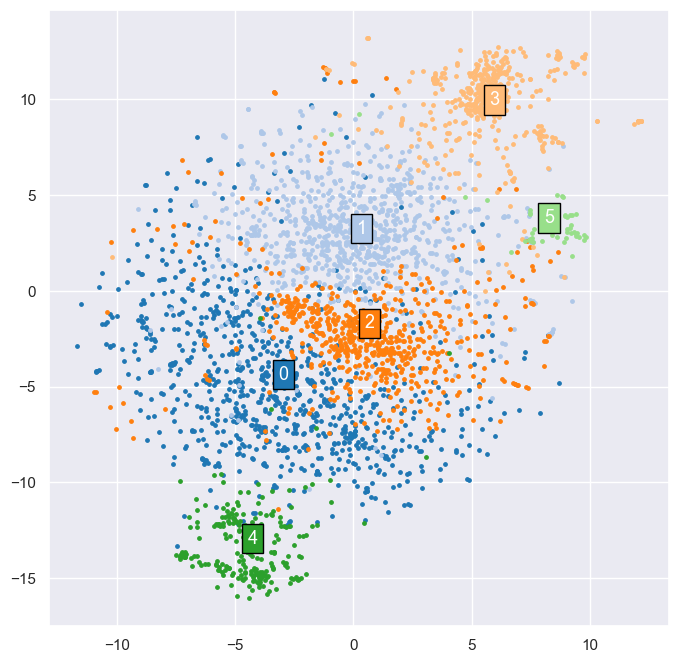

In [59]:
fig,ax=plt.subplots(figsize=(8,8))
plot_clusters(tsne_coords,clusters,ax)
plt.show()

In [60]:
#クラスタリング後の解析
sns.set(style='whitegrid')

cell_labels=df_scaled.columns.get_level_values(0) #細胞ラベル
cell_clusters=['Cluster-'+str(cl) for cl in clusters] #クラスタ番号

df_c=pd.DataFrame(zip(cell_labels,cell_clusters), #細胞ラベル、クラスタ番号でdfを作成
                  columns=['Label','Cluster'])

df_c=pd.crosstab(df_c['Label'],df_c['Cluster']) #細胞ラベル、クラスタ番号でクロス集計
df_c=df_c.loc[['Days0-3','Days6-9','Days12-15','Days18-21','Days24-27']] #時系列で並び替え
df_c

Cluster,Cluster-0,Cluster-1,Cluster-2,Cluster-3,Cluster-4,Cluster-5
Label,,,,,,
Days0-3,1,190,3,257,0,8
Days6-9,62,299,240,109,6,21
Days12-15,194,134,185,18,76,16
Days18-21,291,93,116,29,121,4
Days24-27,332,150,102,6,35,4


In [61]:
proportions=100*df_c.values/df_c.values.sum(axis=1)[:,None] #パーセンテージに変換
df_c=pd.DataFrame(proportions,index=df_c.index,columns=df_c.columns)
df_c

Cluster,Cluster-0,Cluster-1,Cluster-2,Cluster-3,Cluster-4,Cluster-5
Label,,,,,,
Days0-3,0.217865,41.394336,0.653595,55.991285,0.000000,1.742919
Days6-9,8.412483,40.569878,32.564450,14.789688,0.814111,2.849389
Days12-15,31.139647,21.508828,29.695024,2.889246,12.199037,2.568218
Days18-21,44.495413,14.220183,17.737003,4.434251,18.501529,0.611621
Days24-27,52.782194,23.847377,16.216216,0.953895,5.564388,0.635930


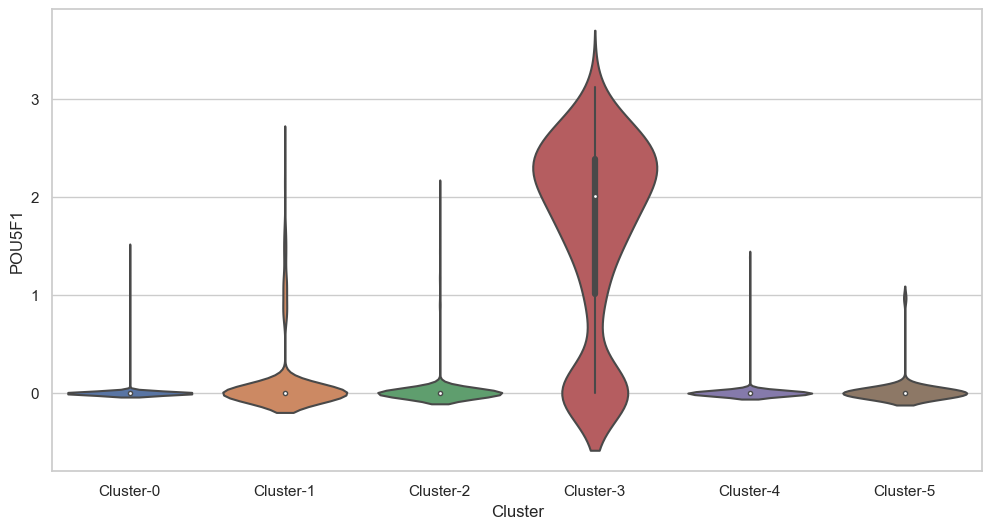

In [62]:
#特定の遺伝子の発現量をクラスタ間で比較
expressions=df_HVGs.loc['ENSG00000204531',:].values #発現量
df_expr=pd.DataFrame(zip(cell_clusters,expressions),
                     columns=['Cluster','POU5F1'])

fig,ax=plt.subplots(figsize=(12,6))
sns.violinplot(x='Cluster',y='POU5F1',data=df_expr,scale='width',
               order=np.sort(np.unique(cell_clusters)),ax=ax)
plt.show()